# Spotify

In [20]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans

from matplotlib import pyplot as plt
import seaborn as sn 

from sklearn.metrics import silhouette_score


# Data Read

In [6]:
df_original = pd.read_csv("./df_audio_features_1000.csv", index_col= ["name", "artist"])
df_original.head()

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
name,artist,,,,,,,,,,,,,,,,
All Shook Up,Elvis Presley,0.624,0.468,10,-12.162,1,0.1320,0.881,0.000006,0.144,0.952,74.139,NaN,117080,4,5ueyLj6e6oVaTY0KQ6yLaA,https://open.spotify.com/track/5ueyLj6e6oVaTY0...
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.585,0.247,1,-12.612,1,0.0400,0.452,0.000009,0.107,0.591,127.150,NaN,223760,4,3aEJMh1cXKEjgh52claxQp,https://open.spotify.com/track/3aEJMh1cXKEjgh5...
Smoke Gets In Your Eyes,The Platters,0.290,0.227,3,-13.060,1,0.0311,0.944,0.000079,0.617,0.224,114.278,NaN,157293,4,307XEC1IUwUs9ojlEFwH7f,https://open.spotify.com/track/307XEC1IUwUs9oj...
"What'd I Say, Pt. 1 & 2",Ray Charles,0.540,0.681,4,-5.440,1,0.0508,0.808,0.000000,0.162,0.794,88.385,NaN,307053,4,5yQ9iMZXGcr5rlO4hoLsP4,https://open.spotify.com/track/5yQ9iMZXGcr5rlO...
Dream A Little Dream Of Me,Ella Fitzgerald,0.455,0.167,0,-13.613,1,0.0739,0.918,0.000000,0.173,0.404,76.118,NaN,185067,4,3vFVS2WYHDG4KkWCNecvpn,https://open.spotify.com/track/3vFVS2WYHDG4KkW...


# Drop Unnecessary Columns

In [9]:
df = df_original.copy()

DROP_COLUMNS = ["id", "html", "mode", "type", "time_signature", "duration_ms"]

df = df.drop(DROP_COLUMNS, axis= "columns")
df.head()

,,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name,artist,,,,,,,,,,
All Shook Up,Elvis Presley,0.624,0.468,10,-12.162,0.1320,0.881,0.000006,0.144,0.952,74.139
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.585,0.247,1,-12.612,0.0400,0.452,0.000009,0.107,0.591,127.150
Smoke Gets In Your Eyes,The Platters,0.290,0.227,3,-13.060,0.0311,0.944,0.000079,0.617,0.224,114.278
"What'd I Say, Pt. 1 & 2",Ray Charles,0.540,0.681,4,-5.440,0.0508,0.808,0.000000,0.162,0.794,88.385
Dream A Little Dream Of Me,Ella Fitzgerald,0.455,0.167,0,-13.613,0.0739,0.918,0.000000,0.173,0.404,76.118


In [10]:
labels = df.columns
labels

Index(['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

# Normalisation

In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(df)
scaled_df = scaler.transform(df)


In [12]:
scaled_df

array([[6.24060150e-01, 4.69868713e-01, 9.09090909e-01, ...,
        1.27864772e-01, 9.65817278e-01, 1.56106344e-01],
       [5.80937638e-01, 2.47976640e-01, 9.09090909e-02, ...,
        8.94949704e-02, 5.91879014e-01, 4.94566605e-01],
       [2.54754533e-01, 2.27895910e-01, 2.72727273e-01, ...,
        6.18376024e-01, 2.11725710e-01, 4.12382521e-01],
       ...,
       [0.00000000e+00, 9.13372030e-04, 8.18181818e-01, ...,
        5.85917246e-02, 1.53304330e-02, 1.39723159e-01],
       [8.11587793e-02, 2.08635778e-02, 3.63636364e-01, ...,
        9.36430571e-02, 4.09156826e-02, 1.11221780e-01],
       [3.25519682e-01, 4.88761970e-02, 4.54545455e-01, ...,
        2.73047807e-01, 2.41765071e-01, 9.21378588e-02]])

In [13]:
# Create a DataFrame from the Scaled
scaled_df = pd.DataFrame(scaled_df, index = df.index, columns= labels)
scaled_df.head()

,,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name,artist,,,,,,,,,,
All Shook Up,Elvis Presley,0.624060,0.469869,0.909091,0.708800,0.196816,0.884538,0.000006,0.127865,0.965817,0.156106
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.580938,0.247977,0.090909,0.698907,0.030391,0.453814,0.000009,0.089495,0.591879,0.494567
Smoke Gets In Your Eyes,The Platters,0.254755,0.227896,0.272727,0.689059,0.014291,0.947791,0.000081,0.618376,0.211726,0.412383
"What'd I Say, Pt. 1 & 2",Ray Charles,0.531181,0.683728,0.363636,0.856565,0.049928,0.811245,0.000000,0.146531,0.802155,0.247063
Dream A Little Dream Of Me,Ella Fitzgerald,0.437196,0.167654,0.000000,0.676903,0.091715,0.921687,0.000000,0.157938,0.398177,0.168742


# Correlation

In [14]:
scaled_df.corr()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
danceability,1.000000,0.545512,-0.001341,0.640503,0.373654,-0.579392,-0.535295,-0.060275,0.714003,0.074740
energy,0.545512,1.000000,0.014265,0.845128,0.356334,-0.818499,-0.487391,0.138565,0.563674,0.285091
key,-0.001341,0.014265,1.000000,0.023397,0.019729,-0.031787,-0.013205,0.038828,-0.012903,0.003781
loudness,0.640503,0.845128,0.023397,1.000000,0.327058,-0.715860,-0.621958,0.078611,0.552875,0.252120
speechiness,0.373654,0.356334,0.019729,0.327058,1.000000,-0.379788,-0.238243,0.031270,0.197187,0.104111
acousticness,-0.579392,-0.818499,-0.031787,-0.715860,-0.379788,1.000000,0.475025,-0.052369,-0.466473,-0.249964
instrumentalness,-0.535295,-0.487391,-0.013205,-0.621958,-0.238243,0.475025,1.000000,-0.032430,-0.493650,-0.126451
liveness,-0.060275,0.138565,0.038828,0.078611,0.031270,-0.052369,-0.032430,1.000000,-0.023370,0.021682
valence,0.714003,0.563674,-0.012903,0.552875,0.197187,-0.466473,-0.493650,-0.023370,1.000000,0.157788
tempo,0.074740,0.285091,0.003781,0.252120,0.104111,-0.249964,-0.126451,0.021682,0.157788,1.000000


# Plot the correlation

<AxesSubplot: >

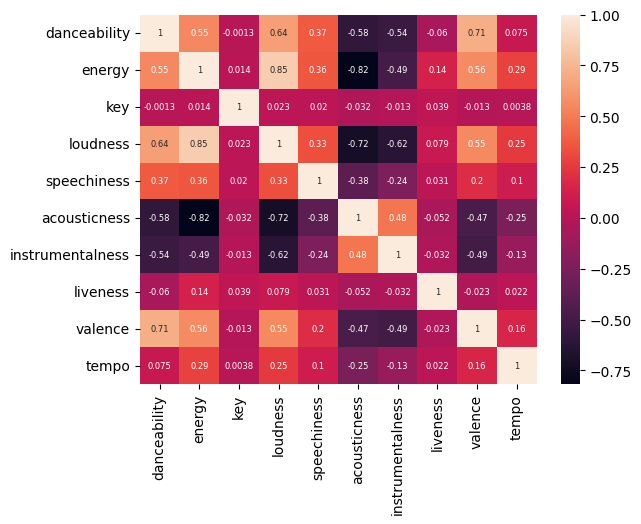

In [16]:
sn.heatmap(
    scaled_df.corr(),
    annot = True,
    annot_kws= {"fontsize": 6}
)

# PLot some Pair Plots

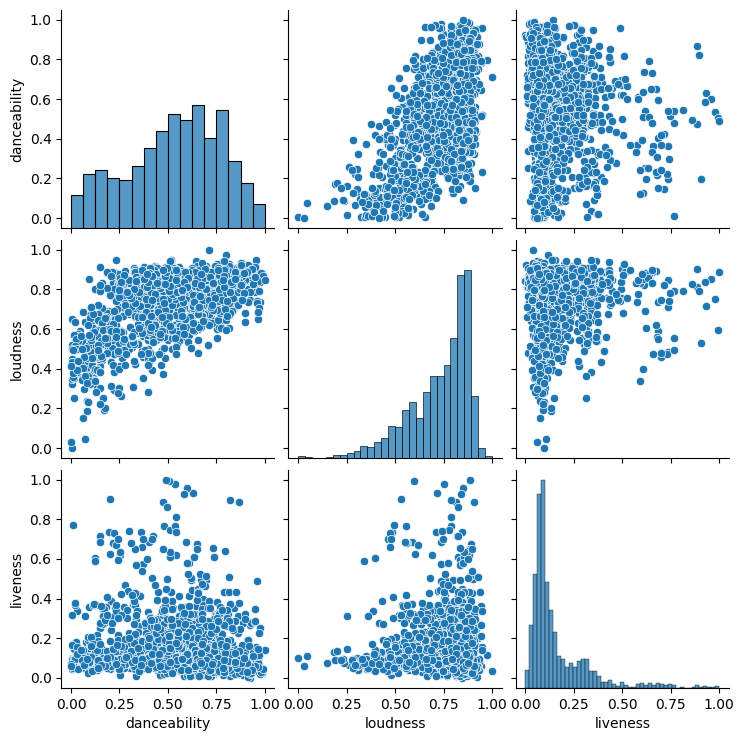

In [18]:
# sn.pairplot(scaled_df)
sn.pairplot(scaled_df, vars = ["danceability", "loudness", "liveness"])

# KMeans

In [19]:
# Select specific Columns for my Clustering
train_df = scaled_df[["danceability", "loudness", "liveness"]]
train_df.head()

,,danceability,loudness,liveness
name,artist,,,
All Shook Up,Elvis Presley,0.624060,0.708800,0.127865
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.580938,0.698907,0.089495
Smoke Gets In Your Eyes,The Platters,0.254755,0.689059,0.618376
"What'd I Say, Pt. 1 & 2",Ray Charles,0.531181,0.856565,0.146531
Dream A Little Dream Of Me,Ella Fitzgerald,0.437196,0.676903,0.157938


In [25]:
list_of_silhouetescores = []
k_range = range(2, 10)

for k in k_range:
    model = KMeans(n_clusters = k)

    # Fit the model 
    model.fit(train_df) # calculate the centroids
    
    # add the error to the list
    s_score = silhouette_score(train_df, model.labels_)
    
    list_of_silhouetescores.append(s_score)

c:\Python\Python3108\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python\Python3108\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python\Python3108\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python\Python3108\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python\Python3108\lib\site-packages\sklearn\cluster\_kmeans.py:870: F

Text(0, 0.5, 'Silh. Score')

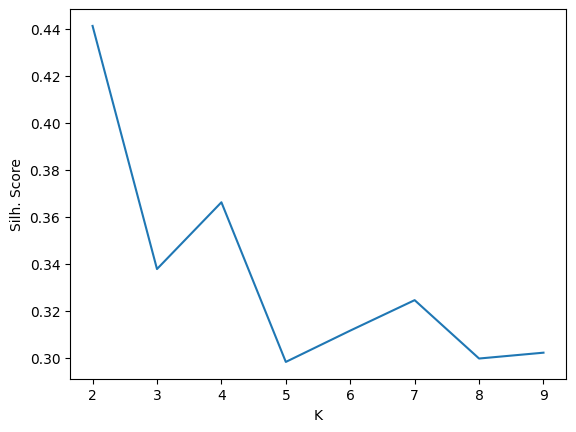

In [26]:
plt.plot(k_range, list_of_silhouetescores)
plt.xlabel("K")
plt.ylabel("Silh. Score")